# Import

In [1]:
import pandas  as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Student Mental health.csv')

In [3]:
df.head()

Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes                        No   
2                     Yes                  Yes                       Yes   
3                     Yes                   No                        No   
4                      No                   No                        No   

  Did you seek any specialist for a treatment?  
0                                           No  
1                                           No  
2                                           No  
3                                           No  
4                                           No

In [4]:
df.tail()

Timestamp Choose your gender   Age What is your course?  \
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
96                      year 1        3.50 - 4.00             No   
97                      Year 2        3.00 - 3.49             No   
98                      Year 3        3.50 - 4.00            Yes   
99                      year 4        3.50 - 4.00             No   
100                     Year 2        3.00 - 3.49             No   

    Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
96                       No                  Yes                        No   
97                      Yes                  Yes                        No   
98                      Yes                   No                       Yes   
99                       No                   No                        No   
100                      No                   No                        No   

    Did you seek any specialist for a treatment?  
96                                            No  
97                                            No  
98                                            No  
99                                            No  
100                                           No

In [58]:
df.describe()

Age  Do you have Depression?
count  100.00000               100.000000
mean    20.53000                 0.350000
std      2.49628                 0.479372
min     18.00000                 0.000000
25%     18.00000                 0.000000
50%     19.00000                 0.000000
75%     23.00000                 1.000000
max     24.00000                 1.000000

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     100 non-null    object 
 1   Choose your gender                            100 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          100 non-null    object 
 4   Your current year of Study                    100 non-null    object 
 5   What is your CGPA?                            100 non-null    object 
 6   Marital status                                100 non-null    object 
 7   Do you have Depression?                       100 non-null    int64  
 8   Do you have Anxiety?                          100 non-null    object 
 9   Do you have Panic attack?                     100 non-null    obj

In [7]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [8]:
df.dropna(inplace=True)

- Timestamp: The time at which the response was submitted.
- Choose your gender: The gender of the respondent.
- Age: The age of the respondent.
- What is your course?: The course of study.
- Your current year of Study: The current academic year of the respondent.
- What is your CGPA?: The current CGPA range of the respondent.
- Marital status: The marital status of the respondent.
- Do you have Depression?: Indicates if the respondent has depression.
- Do you have Anxiety?: Indicates if the respondent has anxiety.
- Do you have Panic attack?: Indicates if the respondent has panic attacks.
- Did you seek any specialist for a treatment?: Indicates if the respondent sought treatment from a specialist.

In [9]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

# Visualization


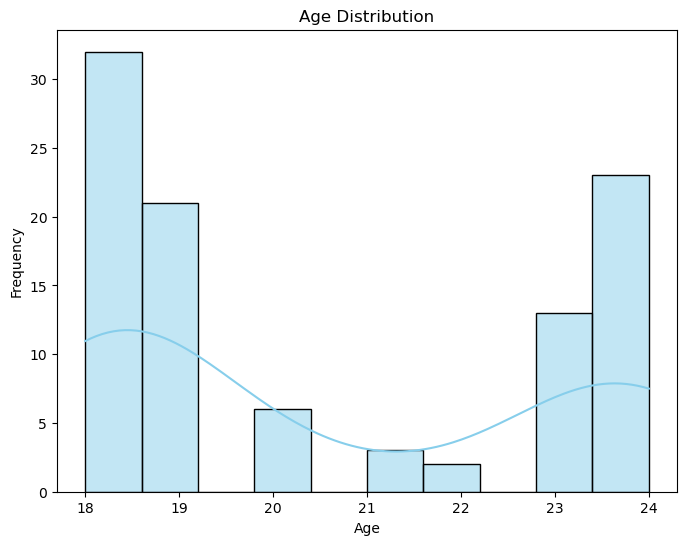

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, color='skyblue', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The age distribution of respondents is skewed towards younger individuals, which is expected given the student-based nature of the survey. Most respondents are in their early 20s, aligning with typical university age ranges.

In [11]:
mental_health_issues = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']
melted_data = pd.melt(df, value_vars=mental_health_issues)

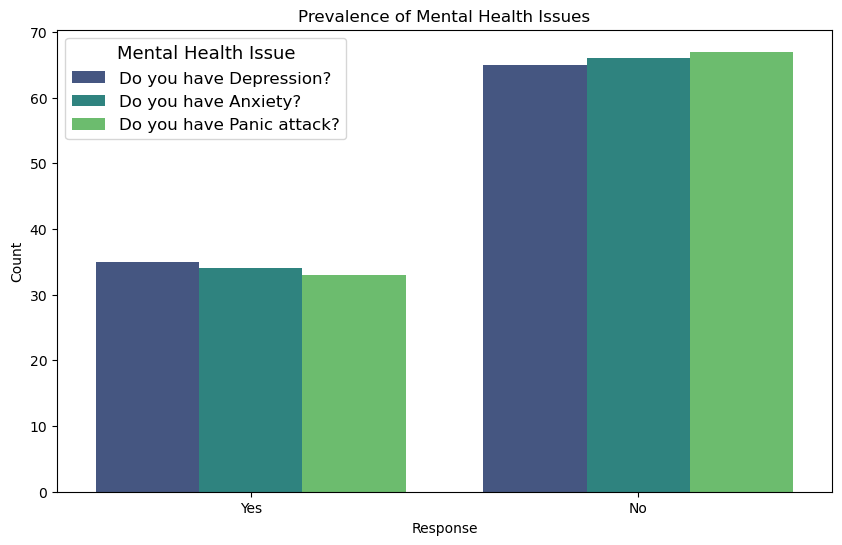

In [12]:



plt.figure(figsize=(10, 6))
sns.countplot(x='value', hue='variable', data=melted_data, palette='viridis')
plt.title('Prevalence of Mental Health Issues')
plt.xlabel('Response')
plt.ylabel('Count')
plt.legend(title='Mental Health Issue', title_fontsize='13', fontsize='12')
plt.show()

- Between 35 to 40 students are suffering from mental health issues 

In [13]:
cgpa_mental_health = pd.melt(df, id_vars=['What is your CGPA?', 'Choose your gender', 'Your current year of Study'], 
                             value_vars=['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?'],
                             var_name='Mental Health Issue', value_name='Has Issue')

In [14]:
cgpa_mental_health_yes = cgpa_mental_health[cgpa_mental_health['Has Issue'] == 'Yes']

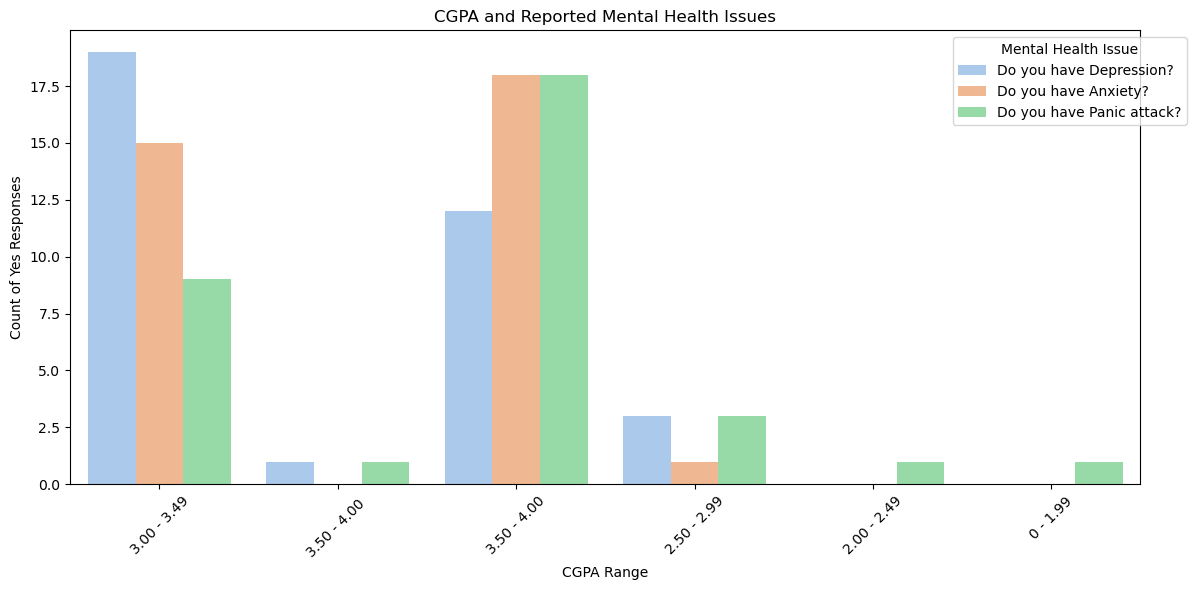

In [15]:

plt.figure(figsize=(12, 6))
sns.countplot(x='What is your CGPA?', hue='Mental Health Issue', data=cgpa_mental_health_yes, palette='pastel')
plt.title('CGPA and Reported Mental Health Issues')
plt.xlabel('CGPA Range')
plt.ylabel('Count of Yes Responses')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Issue', bbox_to_anchor=(1.05, 1))
plt.tight_layout() 
plt.show()

- a higher prevalence of mental health issues in any particular CGPA range could indicate stress and pressure related to academic performance

In [16]:
mental_health_yes = df[(df['Do you have Depression?'] == 'Yes') |
                         (df['Do you have Anxiety?'] == 'Yes') |
                         (df['Do you have Panic attack?'] == 'Yes')]

In [17]:

treatment_counts = mental_health_yes['Did you seek any specialist for a treatment?'].value_counts(normalize=True) * 100
print(treatment_counts)

No     90.625
Yes     9.375
Name: Did you seek any specialist for a treatment?, dtype: float64


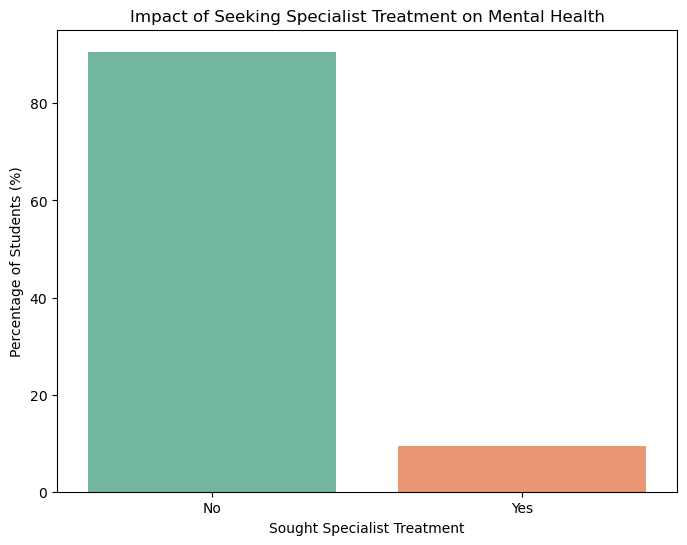

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=treatment_counts.index, y=treatment_counts.values, palette='Set2')
plt.title('Impact of Seeking Specialist Treatment on Mental Health')
plt.xlabel('Sought Specialist Treatment')
plt.ylabel('Percentage of Students (%)')
plt.show()

- A significant majority, approximately 90.6%, of students who reported having mental health issues  did not seek specialist treatment.
- Only about 9.4% of these students reported seeking specialist treatment for their mental health conditions.

In [19]:
year_mental_health = pd.melt(df, id_vars=['Your current year of Study'], 
                             value_vars=['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?'],
                             var_name='Mental Health Issue', value_name='Has Issue')

In [20]:
year_mental_health

Your current year of Study        Mental Health Issue Has Issue
0                       year 1    Do you have Depression?       Yes
1                       year 2    Do you have Depression?        No
2                       Year 1    Do you have Depression?       Yes
3                       year 3    Do you have Depression?       Yes
4                       year 4    Do you have Depression?        No
..                         ...                        ...       ...
295                     year 1  Do you have Panic attack?        No
296                     Year 2  Do you have Panic attack?        No
297                     Year 3  Do you have Panic attack?       Yes
298                     year 4  Do you have Panic attack?        No
299                     Year 2  Do you have Panic attack?        No

[300 rows x 3 columns]

In [21]:
year_mental_health_yes = year_mental_health[year_mental_health['Has Issue'] == 'Yes']

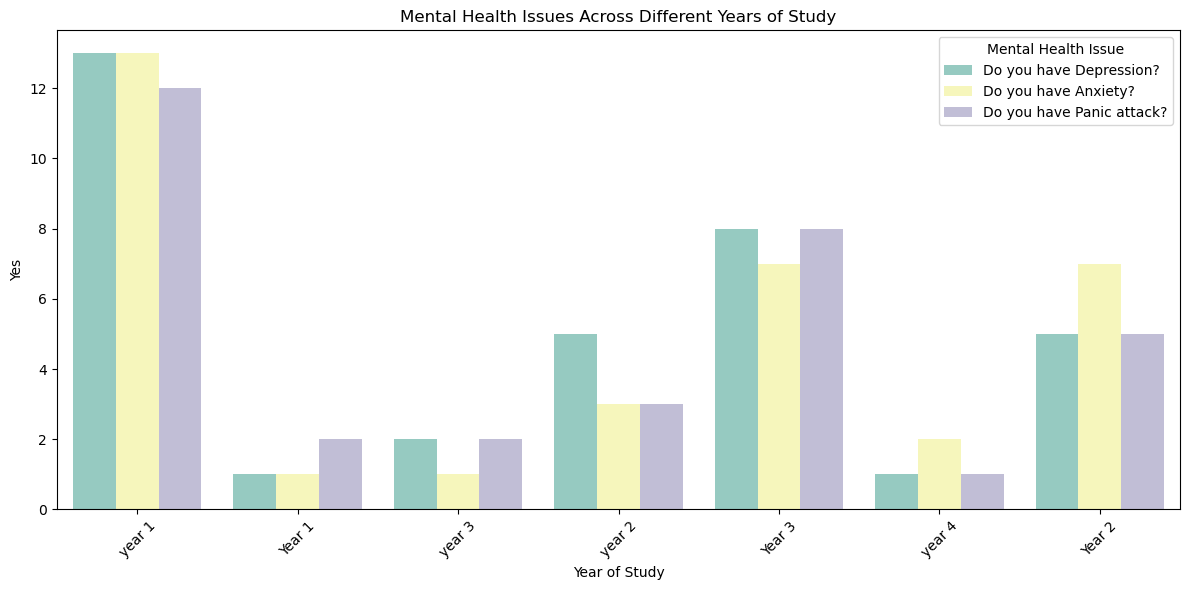

In [22]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Your current year of Study', hue='Mental Health Issue', data=year_mental_health_yes, palette='Set3')
plt.title('Mental Health Issues Across Different Years of Study')
plt.xlabel('Year of Study')
plt.ylabel('Yes')
plt.xticks(rotation=45)
plt.legend(title='Mental Health Issue')
plt.tight_layout()
plt.show()

- it's common to find higher reports in first year and final year due to adjustment to university life or stress about future prospects.
- Seeing which mental health issues are more prevalent in each academic year. Anxiety might be consistently high across all years, while depression and panic attacks could vary more significantly.


In [23]:
gender_depression_yes = df[df['Do you have Depression?'] == 'Yes']['Choose your gender'].value_counts(normalize=True) * 100
gender_anxiety_yes = df[df['Do you have Anxiety?'] == 'Yes']['Choose your gender'].value_counts(normalize=True) * 100
gender_panic_attack_yes = df[df['Do you have Panic attack?'] == 'Yes']['Choose your gender'].value_counts(normalize=True) * 100



In [24]:
mental_health_issues_percentage = pd.DataFrame({
    'Depression': gender_depression_yes,
    'Anxiety': gender_anxiety_yes,
    'Panic Attack': gender_panic_attack_yes
}).fillna(0) 


In [25]:

mental_health_issues_percentage

Depression    Anxiety  Panic Attack
Female   82.857143  70.588235     75.757576
Male     17.142857  29.411765     24.242424

In [26]:

gender_mental_health = pd.melt(df, id_vars=['Choose your gender'], 
                               value_vars=['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?'],
                               var_name='Mental Health Issue', value_name='Has Issue')

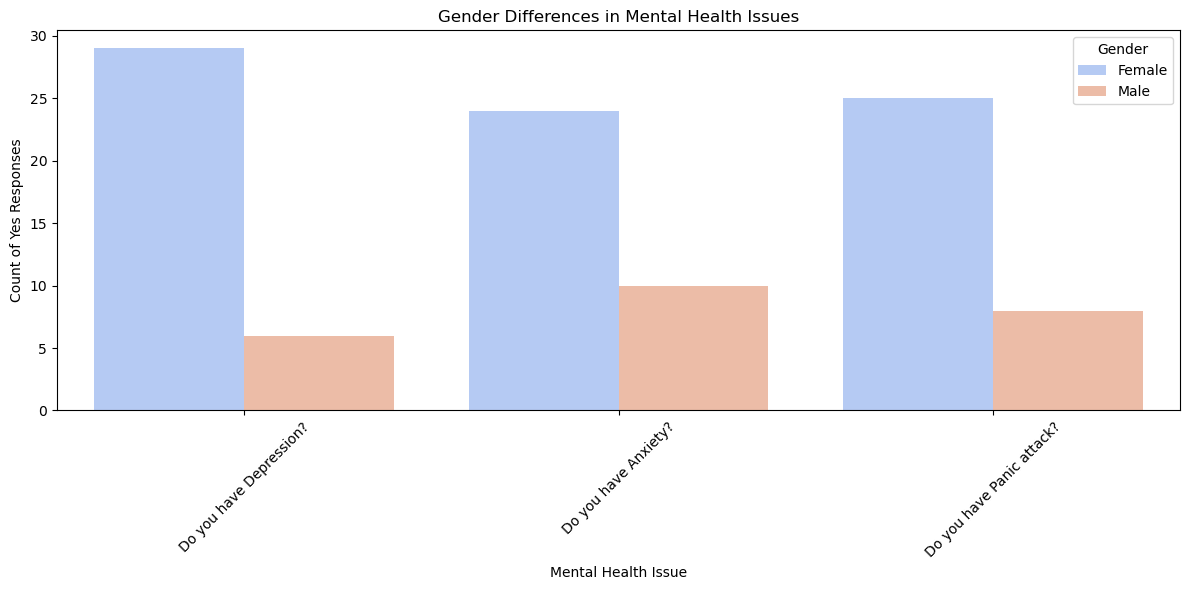

In [27]:

gender_mental_health_yes = gender_mental_health[gender_mental_health['Has Issue'] == 'Yes']

plt.figure(figsize=(12, 6))
sns.countplot(x='Mental Health Issue', hue='Choose your gender', data=gender_mental_health_yes, palette='coolwarm')
plt.title('Gender Differences in Mental Health Issues')
plt.xlabel('Mental Health Issue')
plt.ylabel('Count of Yes Responses')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


- these findings suggest that female students are more likely to report experiencing mental health issues than male students.

In [28]:
data_numeric = df.copy()

In [29]:


data_numeric['Do you have Depression?'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
data_numeric['Do you have Anxiety?'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
data_numeric['Do you have Panic attack?'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

In [30]:
data_numeric

Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0                       year 1        3.00 - 3.49             No   
1                       year 2        3.00 - 3.49             No   
2                       Year 1        3.00 - 3.49             No   
3                       year 3        3.00 - 3.49            Yes   
4                       year 4        3.00 - 3.49             No   
..                         ...                ...            ...   
96                      year 1        3.50 - 4.00             No   
97                      Year 2        3.00 - 3.49             No   
98                      Year 3        3.50 - 4.00            Yes   
99                      year 4        3.50 - 4.00             No   
100                     Year 2        3.00 - 3.49             No   

     Do you have Depression?  Do you have Anxiety?  Do you have Panic attack?  \
0                          1                     0                          1   
1                          0                     1                          0   
2                          1                     1                          1   
3                          1                     0                          0   
4                          0                     0                          0   
..                       ...                   ...                        ...   
96                         0                     1                          0   
97                         1                     1                          0   
98                         1                     0                          1   
99                         0                     0                          0   
100                        0                     0                          0   

    Did you seek any specialist for a treatment?  
0                                             No  
1                                             No  
2                                             No  
3                                             No  
4                                             No  
..                                           ...  
96                                            No  
97                                            No  
98                                            No  
99                                            No  
100                                           No  

[100 rows x 11 columns]

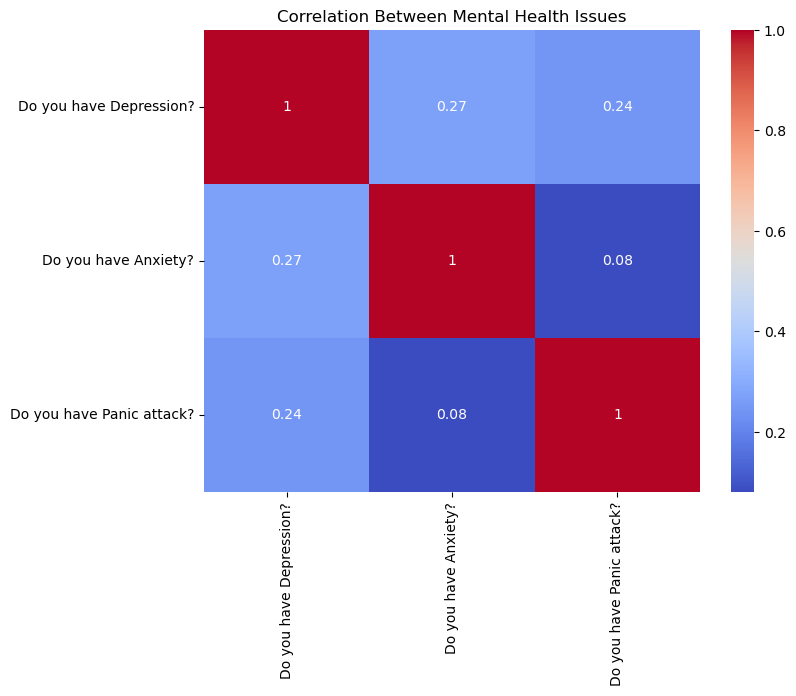

In [31]:



correlation_matrix = data_numeric[['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Mental Health Issues')
plt.show()


# Obersvation

- Gender Differences: Female students report higher instances of depression, anxiety, and panic attacks compared to male students. This suggests that mental health issues may affect genders differently, highlighting the need for gender-sensitive approaches in mental health support.

- Academic Performance (CGPA): While we explored the distribution of mental health issues across different CGPA ranges, specific insights into trends or patterns would require deeper statistical analysis. Generally, examining the relationship between CGPA and mental health can help identify if academic stress correlates with mental health conditions.

- Seeking Treatment: A significant majority of students reporting mental health issues do not seek specialist treatment. This underlines a potential gap in awareness, accessibility, or willingness to seek professional help among students.

- Correlation Between Mental Health Conditions: There's a moderate positive correlation between depression and anxiety, as well as depression and panic attacks. This indicates that these mental health issues often co-occur, suggesting that students experiencing one may be at a higher risk of experiencing others.

# Suggestion 

- Improve Access to Mental Health Services: Enhance on-campus counseling and support services tailored for depression and anxiety.
- Increase Awareness and Destigmatize: Run campaigns to educate on mental health and reduce stigma, making it easier for students to seek help.
- Offer Gender-Sensitive Support: Adapt services to address the different needs of male and female students, acknowledging the gender differences in mental health issues.
- Promote Help-Seeking: Develop initiatives that encourage students to seek professional help and integrate mental health awareness into academic advising.
- Manage Academic Stress: Implement programs focused on stress management, study skills, and time management to mitigate academic pressure.
- Continuous Research and Evaluation: Regularly assess student mental health needs and the effectiveness of support services to adapt strategies accordingly.

# Data Pipeline

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df['Do you have Depression?'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})

In [34]:
x = df.drop(['Do you have Depression?', 'Timestamp'], axis=1)
y = df['Do you have Depression?']

In [41]:
categorical_features = x.select_dtypes(include=['object']).columns
categorical_features

Index(['Choose your gender', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [42]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import  OneHotEncoder
from sklearn.impute import SimpleImputer

In [43]:

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [44]:
from sklearn.compose import ColumnTransformer

In [45]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
])

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression

In [48]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [49]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Choose your gender', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Anxiety?', 'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [50]:
y_pred = model.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score,classification_report

In [52]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [53]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.40      0.57         5

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20



In [54]:
 from sklearn.metrics import confusion_matrix

In [56]:
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

In [57]:
conf_matrix

array([[15,  0],
       [ 3,  2]], dtype=int64)